<a href="https://colab.research.google.com/github/LuisIrigoyen/trabajo_final_RL/blob/Edward_Flores/Proyecto_pra%CC%81ctico_grupo_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad - Proyecto práctico


> La actividad se desarrollará en grupos pre-definidos de 2-3 alumnos. Se debe indicar los nombres en orden alfabético (de apellidos). Recordad que esta actividad se corresponde con un 30% de la nota final de la asignatura. Se debe entregar entregar el trabajo en la presente notebook.
*   Alumno 1:
*   Alumno 2:
*   Alumno 3:






---
## **PARTE 1** - Instalación y requisitos previos

> Las prácticas han sido preparadas para poder realizarse en el entorno de trabajo de Google Colab. Sin embargo, esta plataforma presenta ciertas incompatibilidades a la hora de visualizar la renderización en gym. Por ello, para obtener estas visualizaciones, se deberá trasladar el entorno de trabajo a local. Por ello, el presente dosier presenta instrucciones para poder trabajar en ambos entornos. Siga los siguientes pasos para un correcto funcionamiento:
1.   **LOCAL:** Preparar el enviroment, siguiendo las intrucciones detalladas en la sección *1.1.Preparar enviroment*.
2.  **AMBOS:** Modificar las variables "mount" y "drive_mount" a la carpeta de trabajo en drive en el caso de estar en Colab, y ejecturar la celda *1.2.Localizar entorno de trabajo*.
3. **COLAB:** se deberá ejecutar las celdas correspondientes al montaje de la carpeta de trabajo en Drive. Esta corresponde a la sección *1.3.Montar carpeta de datos local*.
4.  **AMBOS:** Instalar las librerías necesarias, siguiendo la sección *1.4.Instalar librerías necesarias*.


---
### 1.1. Preparar enviroment (solo local)



> Para preparar el entorno de trabajo en local, se han seguido los siguientes pasos:
1. En Windows, puede ser necesario instalar las C++ Build Tools. Para ello, siga los siguientes pasos: https://towardsdatascience.com/how-to-install-openai-gym-in-a-windows-environment-338969e24d30.
2. Instalar Anaconda
3. Siguiendo el código que se presenta comentado en la próxima celda: Crear un enviroment, cambiar la ruta de trabajo, e instalar librerías básicas.


```
conda create --name miar_rl python=3.8
conda activate miar_rl
cd "PATH_TO_FOLDER"
conda install git
pip install jupyter
```


4. Abrir la notebook con *jupyter-notebook*.



```
jupyter-notebook
```


---
### 1.2. Localizar entorno de trabajo: Google colab o local

In [ ]:
# ATENCIÓN!! Modificar ruta relativa a la práctica si es distinta (drive_root)
mount='/content/gdrive'
drive_root = mount + "/MyDrive/dqn_spaceinvaders_checkpoints"
try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

---
### 1.3. Montar carpeta de datos local (solo Colab)

In [ ]:
# Switch to the directory on the Google Drive that you want to use
import os
if IN_COLAB:
  print("We're running Colab")

  if IN_COLAB:
    # Mount the Google Drive at mount
    print("Colab: mounting Google drive on ", mount)

    drive.mount(mount)

    # Create drive_root if it doesn't exist
    create_drive_root = True
    if create_drive_root:
      print("\nColab: making sure ", drive_root, " exists.")
      os.makedirs(drive_root, exist_ok=True)

    # Change to the directory
    print("\nColab: Changing directory to ", drive_root)
    %cd $drive_root
# Verify we're in the correct working directory
%pwd
print("Archivos en el directorio: ")
print(os.listdir())

We're running Colab
Colab: mounting Google drive on  /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

Colab: making sure  /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints  exists.

Colab: Changing directory to  /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints
/content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints
Archivos en el directorio: 
['video', 'logs', 'checkpoint', 'dqn_SpaceInvaders-v0_weights.h5f.data-00000-of-00001', 'dqn_SpaceInvaders-v0_weights.h5f.index', '400k.zip', 'sequential_memory_2.pkl.zip', 'weightsv2.2', 'weightsv2.3', 'sequential_memory_2.3.pkl.zip', 'legacy', 'weightsv4', 'puntuacion 18.3 weigths 5', 'weights_5', 'sequential_memory_5.pkl', 'weights_6', 'wrapper', 'sequential_memory_6.pkl.zip', 'sequential_memory.pkl.zip', 'cut', 'sequential_memory_cut.pkl', 'cutv2', 'sequential_memory_cutv2.pkl']


---
### 1.4. Instalar librerías necesarias

In [ ]:
if IN_COLAB:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install keras-rl2==1.0.5
  %pip install tensorflow==2.12  #2.8
else:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install pyglet==1.5.0
  %pip install h5py==3.1.0
  %pip install Pillow==9.5.0
  %pip install keras-rl2==1.0.5
  %pip install Keras==2.2.4
  %pip install tensorflow==2.5.3
  %pip install torch==2.0.1
  %pip install agents==1.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.3 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.17.3-py3-none-any.whl size=1654617 sha256=a7fc139c037fde3cc6ede75d069b1374e0c7f50d5fa21f52a97c4a1c3942e3f7
  Stored in directory: /root/.cache/pip/wheels/07/8b/b7/570cb90b10f17e85ccb291ba1f04af41ec697745104a2263eb
Successfully built gym
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 3.1.1
    Uninstalling cloudpickle-3.1.1:
      Successfully uninstalled cloudpickle-3.1.1
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires cloudpickle

---
## **PARTE 2**. Enunciado

Consideraciones a tener en cuenta:

- El entorno sobre el que trabajaremos será _SpaceInvaders-v0_ y el algoritmo que usaremos será _DQN_.

- Para nuestro ejercicio, el requisito mínimo será alcanzado cuando el agente consiga una **media de recompensa por encima de 20 puntos en modo test**. Por ello, esta media de la recompensa se calculará a partir del código de test en la última celda del notebook.

Este proyecto práctico consta de tres partes:

1.   Implementar la red neuronal que se usará en la solución
2.   Implementar las distintas piezas de la solución DQN
3.   Justificar la respuesta en relación a los resultados obtenidos

**Rúbrica**: Se valorará la originalidad en la solución aportada, así como la capacidad de discutir los resultados de forma detallada. El requisito mínimo servirá para aprobar la actividad, bajo premisa de que la discusión del resultado sera apropiada.

IMPORTANTE:

* Si no se consigue una puntuación óptima, responder sobre la mejor puntuación obtenida.
* Para entrenamientos largos, recordad que podéis usar checkpoints de vuestros modelos para retomar los entrenamientos. En este caso, recordad cambiar los parámetros adecuadamente (sobre todo los relacionados con el proceso de exploración).
* Se deberá entregar unicamente el notebook y los pesos del mejor modelo en un fichero .zip, de forma organizada.
* Cada alumno deberá de subir la solución de forma individual.

---
## **PARTE 3**. Desarrollo y preguntas

#### Importar librerías

In [ ]:
from __future__ import division

from PIL import Image
import numpy as np
import gym

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Convolution2D, Permute
# from keras.optimizers import Adam  # from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.optimizers import Adam
from keras.optimizers import Adam
import tensorflow.keras.backend as K

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

#### Configuración base

In [ ]:
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4

env_name = 'SpaceInvaders-v0'
env = gym.make(env_name)

np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

In [ ]:
class AtariProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3  # (height, width, channel)
        img = Image.fromarray(observation)
        img = img.resize(INPUT_SHAPE).convert('L')
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

In [ ]:
processor = AtariProcessor()

## 1. Implementación de la red neuronal

In [ ]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Permute

In [ ]:
# Red neuronal
model = Sequential()
model.add(Permute((2, 3, 1), input_shape=(WINDOW_LENGTH, 84, 84)))
model.add(Conv2D(32, (8, 8), strides=(4, 4), activation='relu'))
model.add(Conv2D(64, (4, 4), strides=(2, 2), activation='relu'))
model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(nb_actions, activation='linear'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 permute (Permute)           (None, 84, 84, 4)         0         
                                                                 
 conv2d (Conv2D)             (None, 20, 20, 32)        8224      
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 512)               1606144   
                                                                 
 dense_1 (Dense)             (None, 6)                 3

## 2. Implementación de la solución DQN

### Código Eduardo (Después cambiamos el nombre de esta sección)

hola

In [ ]:
processor = AtariProcessor()

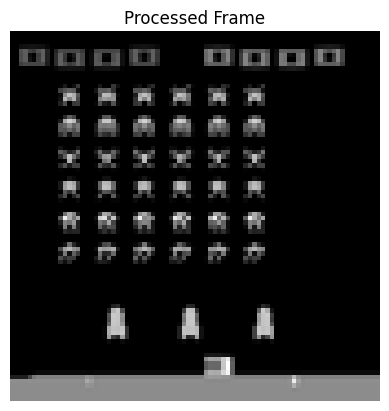

In [ ]:
import matplotlib.pyplot as plt

frame = env.reset()
processed_frame = processor.process_observation(frame)

plt.imshow(processed_frame, cmap='gray')
plt.title("Processed Frame")
plt.axis('off')
plt.show()

In [ ]:
from PIL import Image
import numpy as np

class AtariProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3  # (height, width, channel)

        # 1. Recortar imagen (eliminar HUD, solo zona de juego)
        # Gym Atari frames suelen ser 210x160x3, recortamos y=34:194
        cropped_observation = observation[34:194, :, :]  # shape now (160, 160, 3)

        # 2. Convertir a PIL, escala de grises, redimensionar
        img = Image.fromarray(cropped_observation)
        img = img.resize(INPUT_SHAPE).convert('L')  # INPUT_SHAPE usualmente (84, 84)

        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

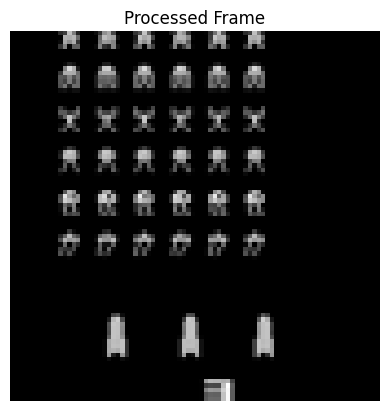

In [ ]:
import matplotlib.pyplot as plt

frame = env.reset()
processed_frame = processor.process_observation(frame)

plt.imshow(processed_frame, cmap='gray')
plt.title("Processed Frame")
plt.axis('off')
plt.show()

Modificamos el ambiente para inicialmente entrenar el agente con 1 sola vida, lo que reduce el horizonte temporal del crédito (es decir, para que el agente aprenda más rápido qué acción llevó a una recompensa)

In [ ]:
import gym

class LifeTerminatingWrapper(gym.Wrapper):
    def __init__(self, env):
        super().__init__(env)
        self.lives = 0
        self.was_real_done = True
        self.steps_since_enemy_kill = 0  # Nuevo contador
        self.consecutive_shots = 0

    def step(self, action):
        obs, reward, done, info = self.env.step(action)

        # --- Terminar episodio si pierde una vida ---
        lives = info.get('ale.lives', 0)
        if self.lives > lives > 0:
            done = True
        self.lives = lives

        return obs, reward, done, info

    def reset(self, **kwargs):
        if self.was_real_done:
            obs = self.env.reset(**kwargs)
        else:
            obs, _, _, _ = self.env.step(0)
        self.lives = self.env.unwrapped.ale.lives()
        self.last_direction = None
        self.direction_streak = 0
        return obs

In [ ]:
import os
from gym.wrappers import Monitor

checkpoint_dir = drive_root
os.makedirs(checkpoint_dir, exist_ok=True)

In [ ]:
from rl.callbacks import Callback

class SaveCheckpointCallback(Callback):
    def __init__(self, interval, path_template, reward_log_path):
        self.interval = interval
        self.path_template = path_template
        self.reward_log_path = reward_log_path
        self.episode_rewards = []

        # Crear carpeta para rewards si es necesario
        if self.reward_log_path:
            reward_dir = os.path.dirname(self.reward_log_path)
            if reward_dir and not os.path.exists(reward_dir):
                os.makedirs(reward_dir)
                print(f"📂 Carpeta creada: {reward_dir}")

    def on_step_end(self, step, logs={}):
        if step % self.interval == 0:
            filename = self.path_template.format(step=step)
            print(f"\n💾 Guardando pesos en: {filename}")
            self.model.save_weights(filename, overwrite=True)


    def on_episode_end(self, episode, logs={}):
        reward = logs.get('episode_reward', 0)
        self.episode_rewards.append(reward)
        if self.reward_log_path:
            np.save(self.reward_log_path, np.array(self.episode_rewards))

In [ ]:
memory = SequentialMemory(limit=330000, window_length=WINDOW_LENGTH)

In [ ]:
env = gym.make(env_name)
env = LifeTerminatingWrapper(env)

#### Entrenamiento parte 1

In [ ]:
# Exploracion 1 a 0.1, # steps -> 400k
nb_steps = 400000
nb_steps_annealing = 300000
nb_steps_warmup=40000

policy = LinearAnnealedPolicy(EpsGreedyQPolicy(),
                              attr='eps',
                              value_max=1, #0.22 # 0.24 # 0.35
                              value_min=0.1, # 0.08
                              value_test=0.0,
                              nb_steps=nb_steps_annealing)


dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=nb_steps_warmup, #30000
               enable_double_dqn=True,
               gamma=0.99, # 0.99
               target_model_update=8500,
               train_interval=4,
               delta_clip=1.0) # si el loss no baja, probar bajarlo a 0.5

dqn.compile(Adam(learning_rate=0.0001), metrics=['mae']) # antes 0.00025

In [ ]:
checkpoint_path = os.path.join(checkpoint_dir, 'cut/dqn_SpaceInvaders-v0_weights.h5f')
reward_log_path = os.path.join(checkpoint_dir, 'logs/episode_rewards_cut.npy')

checkpoint_callback = SaveCheckpointCallback(interval=10000, path_template=checkpoint_path, reward_log_path=reward_log_path)

dqn.fit(env,
        nb_steps=nb_steps,
        visualize=False,
        verbose=2,
        callbacks=[checkpoint_callback])

Training for 400000 steps ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,



💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cut/dqn_SpaceInvaders-v0_weights.h5f
    501/400000: episode: 1, duration: 3.645s, episode steps: 501, steps per second: 137, episode reward:  9.000, mean reward:  0.018 [ 0.000,  1.000], mean action: 2.501 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cut/dqn_SpaceInvaders-v0_weights.h5f
    717/400000: episode: 2, duration: 1.424s, episode steps: 216, steps per second: 152, episode reward:  2.000, mean reward:  0.009 [ 0.000,  1.000], mean action: 2.426 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cut/dqn_SpaceInvaders-v0_weights.h5f
    939/400000: episode: 3, duration: 1.454s, episode steps: 222, steps per second: 153, episode reward:  2.000, mean reward:  0.009 [ 0.000,  1.000], mean action: 2.320 [0.000, 5.000],  loss: --,

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  40185/400000: episode: 138, duration: 14.709s, episode steps: 327, steps per second:  22, episode reward:  6.000, mean reward:  0.018 [ 0.000,  1.000], mean action: 2.746 [0.000, 5.000],  loss: 0.005168, mae: 0.034906, mean_q: 0.060796, mean_eps: 0.879718

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cut/dqn_SpaceInvaders-v0_weights.h5f
  40344/400000: episode: 139, duration: 9.459s, episode steps: 159, steps per second:  17, episode reward:  0.000, mean reward:  0.000 [ 0.000,  0.000], mean action: 2.447 [0.000, 5.000],  loss: 0.008573, mae: 0.018618, mean_q: 0.015574, mean_eps: 0.879208

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cut/dqn_SpaceInvaders-v0_weights.h5f
  40589/400000: episode: 140, duration: 16.391s, episode steps: 245, steps per second:  15, episode reward:  9.000, mean reward:  0.037 [ 0.000,  1.000], mean action: 2.792 [0.000, 5.000],  loss: 0.009388, mae: 0.037327, mean_q: 0.052743, mean_eps: 0.878602

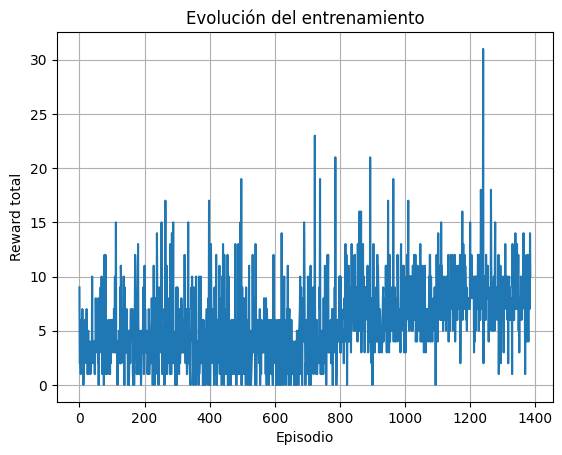

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

episode_rewards = np.load('logs/episode_rewards_cut.npy')

plt.plot(episode_rewards)
plt.xlabel('Episodio')
plt.ylabel('Reward total')
plt.title('Evolución del entrenamiento')
plt.grid()
plt.show()

In [ ]:
# Guardar
import pickle

# Suponiendo que `memory` es tu SequentialMemory
with open('sequential_memory_cut.pkl', 'wb') as f:
    pickle.dump(memory, f)

In [ ]:
env = gym.make(env_name)

In [ ]:
# Testing part to calculate the mean reward
weights_filename = checkpoint_dir + '/cut/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)
env = Monitor(env, './video', force=True)
history = dqn.test(env, nb_episodes=50, visualize=False)

Testing for 50 episodes ...
Episode 1: reward: 13.000, steps: 677
Episode 2: reward: 25.000, steps: 925
Episode 3: reward: 12.000, steps: 495
Episode 4: reward: 24.000, steps: 1296
Episode 5: reward: 17.000, steps: 1028
Episode 6: reward: 10.000, steps: 531
Episode 7: reward: 15.000, steps: 626
Episode 8: reward: 15.000, steps: 914
Episode 9: reward: 10.000, steps: 486
Episode 10: reward: 14.000, steps: 953
Episode 11: reward: 11.000, steps: 602
Episode 12: reward: 26.000, steps: 1287
Episode 13: reward: 14.000, steps: 956
Episode 14: reward: 20.000, steps: 944
Episode 15: reward: 12.000, steps: 663
Episode 16: reward: 17.000, steps: 1266
Episode 17: reward: 26.000, steps: 1752
Episode 18: reward: 15.000, steps: 1296
Episode 19: reward: 7.000, steps: 413
Episode 20: reward: 16.000, steps: 838
Episode 21: reward: 13.000, steps: 731
Episode 22: reward: 10.000, steps: 596
Episode 23: reward: 14.000, steps: 951
Episode 24: reward: 11.000, steps: 601
Episode 25: reward: 13.000, steps: 671
E

In [ ]:
# Access episode rewards
episode_rewards = history.history['episode_reward']

# Calcular el promedio
promedio = np.mean(episode_rewards)

print(f"Recompensa promedio: {promedio}")

Recompensa promedio: 16.2


#### Entrenamiento parte 2

In [ ]:
env = gym.make(env_name)
env = LifeTerminatingWrapper(env)

In [ ]:
# Exploracion 1 a 0.1, # steps -> 400k
nb_steps = 200000
nb_steps_annealing = 180000
nb_steps_warmup=40000

policy = LinearAnnealedPolicy(EpsGreedyQPolicy(),
                              attr='eps',
                              value_max=0.4, #0.22 # 0.24 # 0.35
                              value_min=0.1, # 0.08
                              value_test=0.0,
                              nb_steps=nb_steps_annealing)


dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=nb_steps_warmup, #30000
               enable_double_dqn=True,
               gamma=0.99, # 0.99
               target_model_update=8500,
               train_interval=4,
               delta_clip=1.0) # si el loss no baja, probar bajarlo a 0.5

dqn.compile(Adam(learning_rate=0.0001), metrics=['mae']) # antes 0.00025

In [ ]:
weights_filename = checkpoint_dir + '/cut/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)

In [ ]:
checkpoint_path = os.path.join(checkpoint_dir, 'cutv3/dqn_SpaceInvaders-v0_weights.h5f')
reward_log_path = os.path.join(checkpoint_dir, 'logs/episode_rewards_cutv3.npy')

checkpoint_callback = SaveCheckpointCallback(interval=10000, path_template=checkpoint_path, reward_log_path=reward_log_path)

dqn.fit(env,
        nb_steps=nb_steps,
        visualize=False,
        verbose=2,
        callbacks=[checkpoint_callback])

Training for 200000 steps ...

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cutv3/dqn_SpaceInvaders-v0_weights.h5f


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


    397/200000: episode: 1, duration: 2.655s, episode steps: 397, steps per second: 150, episode reward: 10.000, mean reward:  0.025 [ 0.000,  1.000], mean action: 2.637 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cutv3/dqn_SpaceInvaders-v0_weights.h5f
    786/200000: episode: 2, duration: 2.376s, episode steps: 389, steps per second: 164, episode reward: 10.000, mean reward:  0.026 [ 0.000,  1.000], mean action: 2.308 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cutv3/dqn_SpaceInvaders-v0_weights.h5f
   1049/200000: episode: 3, duration: 1.693s, episode steps: 263, steps per second: 155, episode reward:  8.000, mean reward:  0.030 [ 0.000,  1.000], mean action: 2.513 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoint

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  40199/200000: episode: 123, duration: 14.347s, episode steps: 225, steps per second:  16, episode reward:  8.000, mean reward:  0.036 [ 0.000,  1.000], mean action: 2.467 [0.000, 5.000],  loss: 0.017600, mae: 1.040625, mean_q: 1.271350, mean_eps: 0.333167

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cutv3/dqn_SpaceInvaders-v0_weights.h5f
  40458/200000: episode: 124, duration: 16.663s, episode steps: 259, steps per second:  16, episode reward:  9.000, mean reward:  0.035 [ 0.000,  1.000], mean action: 2.815 [0.000, 5.000],  loss: 0.015329, mae: 1.025893, mean_q: 1.254379, mean_eps: 0.332787

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cutv3/dqn_SpaceInvaders-v0_weights.h5f
  40758/200000: episode: 125, duration: 20.586s, episode steps: 300, steps per second:  15, episode reward:  8.000, mean reward:  0.027 [ 0.000,  1.000], mean action: 2.290 [0.000, 5.000],  loss: 0.013716, mae: 1.005662, mean_q: 1.228180, mean_eps: 0.3

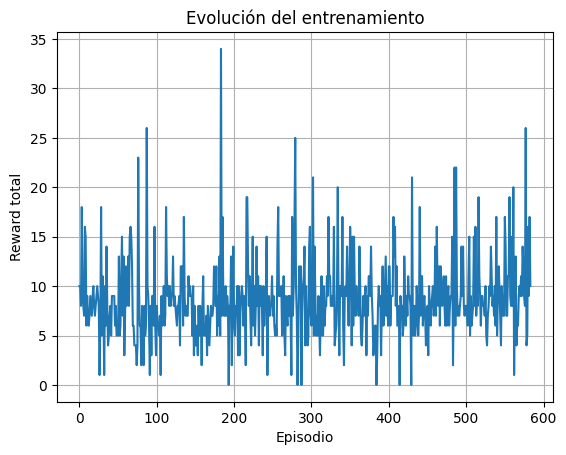

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

episode_rewards = np.load('logs/episode_rewards_cutv3.npy')

plt.plot(episode_rewards)
plt.xlabel('Episodio')
plt.ylabel('Reward total')
plt.title('Evolución del entrenamiento')
plt.grid()
plt.show()

In [ ]:
# Guardar
import pickle

# Suponiendo que `memory` es tu SequentialMemory
with open('sequential_memory_cutv3.pkl', 'wb') as f:
    pickle.dump(memory, f)

In [ ]:
env = gym.make(env_name)

In [ ]:
# Testing part to calculate the mean reward
weights_filename = checkpoint_dir + '/cutv3/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)
env = Monitor(env, './video', force=True)
history = dqn.test(env, nb_episodes=50, visualize=False)

Testing for 50 episodes ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Episode 1: reward: 22.000, steps: 1257
Episode 2: reward: 24.000, steps: 962
Episode 3: reward: 28.000, steps: 1093
Episode 4: reward: 9.000, steps: 526
Episode 5: reward: 17.000, steps: 851
Episode 6: reward: 17.000, steps: 742
Episode 7: reward: 24.000, steps: 1057
Episode 8: reward: 18.000, steps: 1136
Episode 9: reward: 14.000, steps: 643
Episode 10: reward: 21.000, steps: 887
Episode 11: reward: 25.000, steps: 1033
Episode 12: reward: 28.000, steps: 1248
Episode 13: reward: 19.000, steps: 851
Episode 14: reward: 27.000, steps: 1230
Episode 15: reward: 13.000, steps: 729
Episode 16: reward: 23.000, steps: 1114
Episode 17: reward: 12.000, steps: 695
Episode 18: reward: 10.000, steps: 558
Episode 19: reward: 21.000, steps: 951
Episode 20: reward: 31.000, steps: 1811
Episode 21: reward: 14.000, steps: 663
Episode 22: reward: 13.000, steps: 1135
Episode 23: reward: 15.000, steps: 655
Episode 24: reward: 26.000, steps: 1256
Episode 25: reward: 24.000, steps: 858
Episode 26: reward: 16.0

In [ ]:
# Access episode rewards
episode_rewards = history.history['episode_reward']

# Calcular el promedio
promedio = np.mean(episode_rewards)

print(f"Recompensa promedio: {promedio}")

Recompensa promedio: 19.34


#### Entrenamiento parte 3

In [ ]:
memory = SequentialMemory(limit=330000, window_length=WINDOW_LENGTH)

Explicamos el beneficio de utilizar todas las trazas (entrenamiento más estable)

In [ ]:
# Cargar
import pickle

with open('sequential_memory_cut.pkl', 'rb') as f:
    memory = pickle.load(f)

In [ ]:
env = gym.make(env_name)
env = LifeTerminatingWrapper(env)

In [ ]:
# Exploracion 1 a 0.1, # steps -> 400k
nb_steps=50000
nb_steps_annealing=50000
nb_steps_warmup=50000

policy = LinearAnnealedPolicy(EpsGreedyQPolicy(),
                              attr='eps',
                              value_max=0.4, #0.22 # 0.24 # 0.35
                              value_min=0.2, # 0.08
                              value_test=0.0,
                              nb_steps=nb_steps_annealing)


dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=nb_steps_warmup, #30000
               enable_double_dqn=True,
               gamma=0.99, # 0.99
               target_model_update=8500,
               train_interval=4,
               delta_clip=1.0) # si el loss no baja, probar bajarlo a 0.5

dqn.compile(Adam(learning_rate=0.0001), metrics=['mae']) # antes 0.00025

In [ ]:
weights_filename = checkpoint_dir + '/cutv3/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)

In [ ]:
checkpoint_path = os.path.join(checkpoint_dir, 'cutv4/dqn_SpaceInvaders-v0_weights.h5f')
reward_log_path = os.path.join(checkpoint_dir, 'logs/episode_rewards_cutv4.npy')

checkpoint_callback = SaveCheckpointCallback(interval=10000, path_template=checkpoint_path, reward_log_path=reward_log_path)

dqn.fit(env,
        nb_steps=nb_steps,
        visualize=False,
        verbose=2,
        callbacks=[checkpoint_callback])

In [ ]:
# Exploracion 1 a 0.1, # steps -> 400k
nb_steps = 50000
nb_steps_annealing = 50000
nb_steps_warmup=0

policy = LinearAnnealedPolicy(EpsGreedyQPolicy(),
                              attr='eps',
                              value_max=0.1, #0.22 # 0.24 # 0.35
                              value_min=0.08, # 0.08
                              value_test=0.0,
                              nb_steps=nb_steps_annealing)


dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=nb_steps_warmup, #30000
               enable_double_dqn=True,
               gamma=0.99, # 0.99
               target_model_update=8500,
               train_interval=4,
               delta_clip=1.0) # si el loss no baja, probar bajarlo a 0.5

dqn.compile(Adam(learning_rate=0.0001), metrics=['mae']) # antes 0.00025

In [ ]:
weights_filename = checkpoint_dir + '/cutv3/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)

In [ ]:
checkpoint_path = os.path.join(checkpoint_dir, 'cutv4/dqn_SpaceInvaders-v0_weights.h5f')
reward_log_path = os.path.join(checkpoint_dir, 'logs/episode_rewards_cutv4.npy')

checkpoint_callback = SaveCheckpointCallback(interval=10000, path_template=checkpoint_path, reward_log_path=reward_log_path)

dqn.fit(env,
        nb_steps=nb_steps,
        visualize=False,
        verbose=2,
        callbacks=[checkpoint_callback])

Training for 50000 steps ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,



💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cutv4/dqn_SpaceInvaders-v0_weights.h5f
   286/50000: episode: 1, duration: 30.439s, episode steps: 286, steps per second:   9, episode reward: 10.000, mean reward:  0.035 [ 0.000,  1.000], mean action: 3.332 [0.000, 5.000],  loss: 0.017933, mae: 1.482627, mean_q: 1.804475, mean_eps: 0.099942

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cutv4/dqn_SpaceInvaders-v0_weights.h5f
   782/50000: episode: 2, duration: 41.960s, episode steps: 496, steps per second:  12, episode reward: 12.000, mean reward:  0.024 [ 0.000,  1.000], mean action: 1.698 [0.000, 5.000],  loss: 0.014875, mae: 1.505839, mean_q: 1.832015, mean_eps: 0.099786

💾 Guardando pesos en: /content/gdrive/MyDrive/dqn_spaceinvaders_checkpoints/cutv4/dqn_SpaceInvaders-v0_weights.h5f
  1008/50000: episode: 3, duration: 18.895s, episode steps: 226, steps per second:  12, episode reward:  8.000, mean reward:  0.035 [ 0.000,  1.

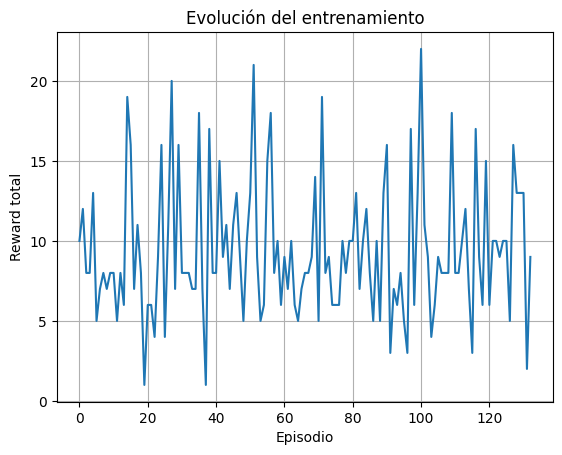

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

episode_rewards = np.load('logs/episode_rewards_cutv4.npy')

plt.plot(episode_rewards)
plt.xlabel('Episodio')
plt.ylabel('Reward total')
plt.title('Evolución del entrenamiento')
plt.grid()
plt.show()

In [ ]:
# Guardar
import pickle

# Suponiendo que `memory` es tu SequentialMemory
with open('sequential_memory_cutv4.pkl', 'wb') as f:
    pickle.dump(memory, f)

In [ ]:
env = gym.make(env_name)

Test

In [ ]:
# Testing part to calculate the mean reward 02
weights_filename = checkpoint_dir + '/cutv4/dqn_{}_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)
env = Monitor(env, './video', force=True)
history = dqn.test(env, nb_episodes=50, visualize=False)

Testing for 50 episodes ...
Episode 1: reward: 35.000, steps: 1809
Episode 2: reward: 17.000, steps: 837
Episode 3: reward: 21.000, steps: 800
Episode 4: reward: 27.000, steps: 1133
Episode 5: reward: 22.000, steps: 942
Episode 6: reward: 19.000, steps: 1104
Episode 7: reward: 22.000, steps: 1542
Episode 8: reward: 29.000, steps: 1409
Episode 9: reward: 20.000, steps: 992
Episode 10: reward: 16.000, steps: 711
Episode 11: reward: 34.000, steps: 1463
Episode 12: reward: 16.000, steps: 870
Episode 13: reward: 19.000, steps: 692
Episode 14: reward: 23.000, steps: 1057
Episode 15: reward: 21.000, steps: 1054
Episode 16: reward: 20.000, steps: 663
Episode 17: reward: 12.000, steps: 538
Episode 18: reward: 22.000, steps: 917
Episode 19: reward: 22.000, steps: 1084
Episode 20: reward: 22.000, steps: 1010
Episode 21: reward: 10.000, steps: 675
Episode 22: reward: 11.000, steps: 643
Episode 23: reward: 15.000, steps: 690
Episode 24: reward: 20.000, steps: 1347
Episode 25: reward: 27.000, steps:

In [ ]:
# Access episode rewards
episode_rewards = history.history['episode_reward']

# Calcular el promedio
promedio = np.mean(episode_rewards)

print(f"Recompensa promedio: {promedio}")

Recompensa promedio: 20.5


### Código Edward (Después cambiamos el nombre de esta sección)

In [1]:
# ATENCIÓN!! Modificar ruta relativa a la práctica si es distinta (drive_root)
mount='/content/gdrive'
drive_root = mount + "/My Drive/08_MIAR/actividades/proyecto practico"

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

In [2]:
# Switch to the directory on the Google Drive that you want to use
import os
if IN_COLAB:
  print("We're running Colab")

  if IN_COLAB:
    # Mount the Google Drive at mount
    print("Colab: mounting Google drive on ", mount)

    drive.mount(mount)

    # Create drive_root if it doesn't exist
    create_drive_root = True
    if create_drive_root:
      print("\nColab: making sure ", drive_root, " exists.")
      os.makedirs(drive_root, exist_ok=True)

    # Change to the directory
    print("\nColab: Changing directory to ", drive_root)
    %cd $drive_root
# Verify we're in the correct working directory
%pwd
print("Archivos en el directorio: ")
print(os.listdir())

We're running Colab
Colab: mounting Google drive on  /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

Colab: making sure  /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico  exists.

Colab: Changing directory to  /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico
/content/gdrive/My Drive/08_MIAR/actividades/proyecto practico
Archivos en el directorio: 
['dqn_models', 'checkpoints', 'dqn_05_weights.h5f.data-00000-of-00001', 'dqn_05_weights.h5f.index', 'dqn_06_weights.h5f.index', 'dqn_06_weights.h5f.data-00000-of-00001', 'dqn_07_weights.h5f.index', 'dqn_07_weights.h5f.data-00000-of-00001', 'dqn_08_weights.h5f.data-00000-of-00001', 'dqn_08_weights.h5f.index', '.ipynb_checkpoints', 'dqn_09_weights.h5f.index', 'dqn_09_weights.h5f.data-00000-of-00001', 'dqn_06_1_weights.h5f.data-00000-of-00001', 'dqn_06_1_weights.h5f.index', 'video', 'dqn_06_3_weights.h5f.index', 'dqn_06

In [3]:
if IN_COLAB:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install keras-rl2==1.0.5
  %pip install tensorflow==2.12  #2.8
else:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install pyglet==1.5.0
  %pip install h5py==3.1.0
  %pip install Pillow==9.5.0
  %pip install keras-rl2==1.05
  %pip install Keras==2.2.4
  %pip install tensorflow==2.1.0
  %pip install torch==2.0.1
  %pip install agents==1.4.0

  Cloning https://github.com/Kojoley/atari-py.git to /tmp/pip-req-build-py59c95w
  Running command git clone --filter=blob:none --quiet https://github.com/Kojoley/atari-py.git /tmp/pip-req-build-py59c95w
  Resolved https://github.com/Kojoley/atari-py.git to commit 86a1e05c0a95e9e6233c3a413521fdb34ca8a089
  Preparing metadata (setup.py) ... done


In [4]:
from __future__ import division

from PIL import Image
import numpy as np
import gym

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, Permute
#from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint


In [5]:
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4

env_name = 'SpaceInvaders-v0'
env = gym.make(env_name)

np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

height, width, channels = env.observation_space.shape
obs = env.reset()
print(height, width, channels)
print("Forma de la observación:", obs.shape)  # Debe ser (height, width, channels)
env.unwrapped.get_action_meanings()

210 160 3
Forma de la observación: (210, 160, 3)


['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']

In [6]:
class AtariProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3  # (height, width, channel)
        img = Image.fromarray(observation)
        img = img.resize(INPUT_SHAPE).convert('L')
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)


In [7]:
def build_model(height, width, channels, actions):

    model = Sequential()
    model.add(Permute((2, 3, 1), input_shape=(4, 84, 84)))  # WINDOW_LENGTH, H, W
    model.add(Conv2D(32, (8, 8), strides=(4, 4), activation='relu')) #, input_shape=(4, 84, 84), data_format='channels_first')) #input_shape=(4,84,84,1)))
    model.add(Conv2D(64, (4, 4), strides=(2, 2), activation='relu'))
    model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu'))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(nb_actions, activation='linear'))
    return model

model = build_model(84, 84, 1, nb_actions)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 permute (Permute)           (None, 84, 84, 4)         0         
                                                                 
 conv2d (Conv2D)             (None, 20, 20, 32)        8224      
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 512)               1606144   
                                                                 
 dense_1 (Dense)             (None, 6)                 3

In [8]:
from rl.agents import DQNAgent
from rl.memory import SequentialMemory
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy

def build_agent(model, actions):
    policy = LinearAnnealedPolicy(
        EpsGreedyQPolicy(),
        attr='eps',
        value_max=1.0,
        value_min=0.01,
        value_test=0.005,
        nb_steps=1000000)                   # Pasos de exploración

    memory = SequentialMemory(
        limit=500000,                       # Replay Buffer (Memoria de experiencias pasadas en total (s,a,r,s'))
        window_length=4)

    dqn = DQNAgent(model=model,
                   nb_actions=nb_actions,
                   policy=policy,
                   memory=memory,
                   processor=AtariProcessor(),
                   nb_steps_warmup=100000,    # Llena en buffer de pasos previos (s,a,r,s') sin evaluar aún.
                   gamma=0.99,
                   target_model_update=10000, # cada 10,000 steps actualiza la red objetivo
                   train_interval=4,          # Solo entrena cada n pasos de interacción con el entorno
                   delta_clip=1.0,            # Valor utilizado para recortar los errores TD (diferencia temporal) durante el entrenamiento para evitar fluctuaciones externas
                   enable_double_dqn=True,
                   enable_dueling_network=True,
                   dueling_type='avg',
                   batch_size=32,
                   )
    return dqn

In [9]:
from rl.callbacks import ModelIntervalCheckpoint,Callback

class EpisodeRewardRecorder(Callback):
    def __init__(self):
        self.episode_rewards = []

    def on_episode_end(self, episode, logs={}):
        reward = logs.get('episode_reward')
        self.episode_rewards.append(reward)

# Guardar el modelo cada 50,000 pasos
checkpoint_callback = ModelIntervalCheckpoint(
    filepath='checkpoints/dqn_v18_weights_{step}.h5f',
    interval=50000,
    verbose=1
)

import os
os.makedirs("checkpoints", exist_ok=True)

from keras.optimizers import Adam

dqn = build_agent(model, nb_actions)
dqn.compile(Adam(learning_rate=0.00025, epsilon=0.001))

### ejfm 1. Implementación de la red neuronal

In [ ]:
def build_model(height, width, channels, actions):

    model = Sequential()
    model.add(Permute((2, 3, 1), input_shape=(4, 84, 84)))  # WINDOW_LENGTH, H, W
    model.add(Conv2D(32, (8, 8), strides=(4, 4), activation='relu')) #, input_shape=(4, 84, 84), data_format='channels_first')) #input_shape=(4,84,84,1)))
    model.add(Conv2D(64, (4, 4), strides=(2, 2), activation='relu'))
    model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu'))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(nb_actions, activation='linear'))
    return model

In [ ]:
model = build_model(84, 84, 1, nb_actions)
model.summary()

### ejfm 2. Implementación de la solución DQN

In [ ]:
from rl.agents import DQNAgent
from rl.memory import SequentialMemory
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy

In [ ]:
def build_agent(model, actions):
    policy = LinearAnnealedPolicy(
        EpsGreedyQPolicy(),
        attr='eps',
        value_max=1.0,
        value_min=0.1,
        value_test=0.05,
        nb_steps=400000)                    # Pasos de exploración

    memory = SequentialMemory(
        limit=400000,                       # Replay Buffer (Memoria de experiencias pasadas en total (s,a,r,s'))
        window_length=4)

    dqn = DQNAgent(model=model,
                   nb_actions=nb_actions,
                   policy=policy,
                   memory=memory,
                   processor=AtariProcessor(),
                   nb_steps_warmup=100000,    # Llena en buffer de pasos previos (s,a,r,s') sin evaluar aún.
                   gamma=0.99,
                   target_model_update=10000, # cada 10,000 steps actualiza la red objetivo
                   train_interval=4,          # Solo entrena cada n pasos de interacción con el entorno
                   delta_clip=1.0,            # Valor utilizado para recortar los errores TD (diferencia temporal) durante el entrenamiento para evitar fluctuaciones externas
                   enable_double_dqn=True,
                   enable_dueling_network=True,
                   dueling_type='avg',
                   batch_size=32,
                   )
    return dqn

In [ ]:
from rl.callbacks import ModelIntervalCheckpoint,Callback

class EpisodeRewardRecorder(Callback):
    def __init__(self):
        self.episode_rewards = []

    def on_episode_end(self, episode, logs={}):
        reward = logs.get('episode_reward')
        self.episode_rewards.append(reward)

# Guardar el modelo cada 50,000 pasos
checkpoint_callback = ModelIntervalCheckpoint(
    filepath='checkpoints/dqn_v16_weights_{step}.h5f',
    interval=50000,
    verbose=1
)

In [ ]:
import os
os.makedirs("checkpoints", exist_ok=True)

In [ ]:
from keras.optimizers import Adam

dqn = build_agent(model, nb_actions)
dqn.compile(Adam(learning_rate=0.00025, epsilon=0.001))

In [ ]:
from datetime import datetime

print(f"⏱ Tiempo de inicio: {datetime.now().strftime('%H:%M:%S')}")

reward_logger = EpisodeRewardRecorder()
historial = dqn.fit(env, nb_steps=1250000, visualize=False, verbose=2,callbacks=[checkpoint_callback,reward_logger])

print(f"⏱ Tiempo de fin: {datetime.now().strftime('%H:%M:%S')}")

# Guardando modelo
rewards = reward_logger.episode_rewards
dqn.save_weights('dqn_v16_weights.h5f')


### ejfm terminada la ejecución se procede con el test de validación para 5 eventos.

Versión del fichero final: dqn_v16_weights.h5f
Testing for 10 episodes ...
Episode 1: reward: 34.000, steps: 1385
Episode 2: reward: 18.000, steps: 695
Episode 3: reward: 19.000, steps: 638
Episode 4: reward: 18.000, steps: 665
Episode 5: reward: 28.000, steps: 1121
Episode 6: reward: 29.000, steps: 1239
Episode 7: reward: 17.000, steps: 567
Episode 8: reward: 24.000, steps: 754
Episode 9: reward: 32.000, steps: 1337
Episode 10: reward: 22.000, steps: 802
Ejecución 1: media = 24.10 

Testing for 10 episodes ...
Episode 1: reward: 31.000, steps: 1244
Episode 2: reward: 25.000, steps: 817
Episode 3: reward: 14.000, steps: 516
Episode 4: reward: 26.000, steps: 979
Episode 5: reward: 29.000, steps: 1030
Episode 6: reward: 26.000, steps: 848
Episode 7: reward: 29.000, steps: 1311
Episode 8: reward: 26.000, steps: 795
Episode 9: reward: 30.000, steps: 1210
Episode 10: reward: 25.000, steps: 948
Ejecución 2: media = 26.10 

Testing for 10 episodes ...
Episode 1: reward: 23.000, steps: 893
Epi

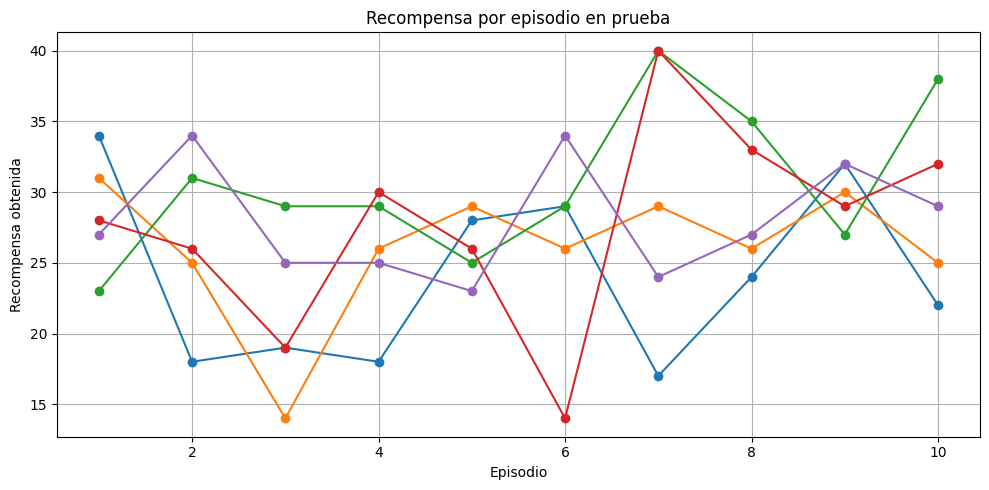

In [11]:
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt

weights_filename = 'dqn_v16_weights.h5f'.format(env_name)

#Número pruebas de validación
test = 5

print(f"Versión del fichero final: {weights_filename}")

medias = []
episode_rewards = []

for i in range(1, test + 1):

    dqn.load_weights(weights_filename)
    # Ejecuta 10 episodios sin explorar (ε=0)
    hist = dqn.test(env, nb_episodes=10, visualize=False)

    # Calcula la media
    media = np.mean(hist.history["episode_reward"])
    medias.append(media)

    # Emite resultado
    print(f"Ejecución {i}: media = {media:.2f} \n")

    # Guardando resultados
    episode_reward = hist.history["episode_reward"]
    episode_rewards.append(episode_reward)

n = sum(m >= 20 for m in medias)
print(f"{n} de {test} pruebas realizadas de 10 episodios cada una.")

# Graficar
plt.figure(figsize=(10, 5))
for i, episode_reward in enumerate(episode_rewards):
    plt.plot(range(1, len(episode_reward) + 1), episode_reward, marker='o', label=f'Ejecución {i + 1}')
plt.xlabel("Episodio")
plt.ylabel("Recompensa obtenida")
plt.title("Recompensa por episodio en prueba")
plt.grid(True)
plt.tight_layout()
plt.show()


### Código Luis (Después cambiamos el nombre de esta sección)

### Código Carlos (Después cambiamos el nombre de esta sección)

## 3. Justificación de los parámetros seleccionados y de los resultados obtenidos

### Eduardo

### Edward

### Luis

### Carlos

---